# Analysis of individual intron reporter qRT-PCR and FACS

In [1]:
from datetime import date
print('created 2024-05-29')
print("last updated", date.today())

created 2024-05-29
last updated 2025-01-20


In [2]:
# imports

import sys
import pickle
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import gmean
from matplotlib.cm import ScalarMappable
from scipy import stats
from scipy.stats import spearmanr
from Levenshtein import distance as lev
from matplotlib.lines import Line2D

sys.path.append("/Users/emmakowal/Dropbox (MIT)/Lab/Cluster/IME/scripts")
from functions import *
from constants import *

# aesthetics

%matplotlib inline
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['figure.dpi']= 200

sns.set_palette("husl", 5)
def nicecolors(n, m=5):
    return sns.color_palette("husl", m)[n]

# path to i/o:
outpath = '/Users/emmakowal/Dropbox (MIT)/Lab/Notebooks/docs/'
IME_path = outpath+'../../Cluster/IME/'

# Import qPCR data

In [3]:
def basic_qPCR_scatterplot(df):
    plt.figure(figsize=(6,5))
    plt.scatter(df.sample_type, df.GFP2dTom)
    plt.ylabel('relative GFP expression vs. \nrelative dTom expression')
    plt.xticks(rotation=30)
    plt.show()

def pretty_qPCR_boxplot(dataframe, title='polyU reporter qRT-PCR', figsize=(6,5)):
    ax = plt.figure(figsize=figsize)
    plt.grid(axis='y', alpha=0.5, linestyle='--')
    ax = sns.boxplot(x='sample_type', y='GFP2dTom', hue='sample_type', data=dataframe, 
                     width=0.6, fliersize=0, palette='mako', legend=False)
    ax.scatter(x='sample_type', y='GFP2dTom', data=dataframe, color='black', marker='x')
    ax.set_ylabel('relative GFP expression vs. \nrelative dTom expression')
    ax.set_xlabel('cell line')
    ax.set_title(title,fontsize=20)
    plt.xticks(rotation=30)
    plt.show()
    
def qPCR_scatterplot(df, title='relative GFP and dTomato per intron', 
                     GFP=True, dTom=True, ratio=True):
    dfSamples = sorted(list(set(df.sample_type)))
    dfSampleOrder = {dfSamples[n]:n for n in range(len(dfSamples))}
    plt.figure(figsize=(12,5))
    if GFP:
        plt.scatter([dfSampleOrder[x]+0.1 for x in df['sample_type']], 
                    df['relative GFP expression'], color='green', marker='x', label='GFP')
    if dTom:
        plt.scatter([dfSampleOrder[x]-0.1 for x in df['sample_type']], 
                    df['relative dTom expression'], color='red', marker='x', label='dTomato')
    if ratio:
        plt.scatter([dfSampleOrder[x] for x in df['sample_type']], 
                    df['GFP2dTom'], color='black', marker='x', label='ratio')
    plt.ylabel('relative expression')
    plt.xticks(range(len(dfSamples)), dfSamples, rotation=30)
    plt.legend(bbox_to_anchor=(1,1), fontsize=12)
    plt.title(title)
    plt.show()

In [4]:
newints_names = ['pEK24',
            'pEK25',
            'pEK26',
            'pEK27',
            'pEK28',
            'pEK29',
            'pEK30',
            'pEK311',
            'pEK312',
            'pEK313',
            'pEK32',
            'pEK33',
            'pEK34',
            'pEK35',
            'pEK36',
            'pEK37',
            'pEK38']
newints_sample_order = {newints_names[n]:n for n in range(len(newints_names))}
newints_sample_order['pEK31'] = newints_sample_order['pEK311']
targets = ['GAPDH','RPL27','GFP3','dTom3','SRP14']
perfect_eff = {t:100 for t in targets}

# import qPCR data which was processed in notebook "2022 polyU qPCR.ipynb"
home_dir = '/Users/emmakowal/Dropbox (MIT)/Lab/qPCR/2022-3/'

with open(home_dir+'newints_12345.pkl','rb') as f:
    newints_12345 = pickle.load(f)

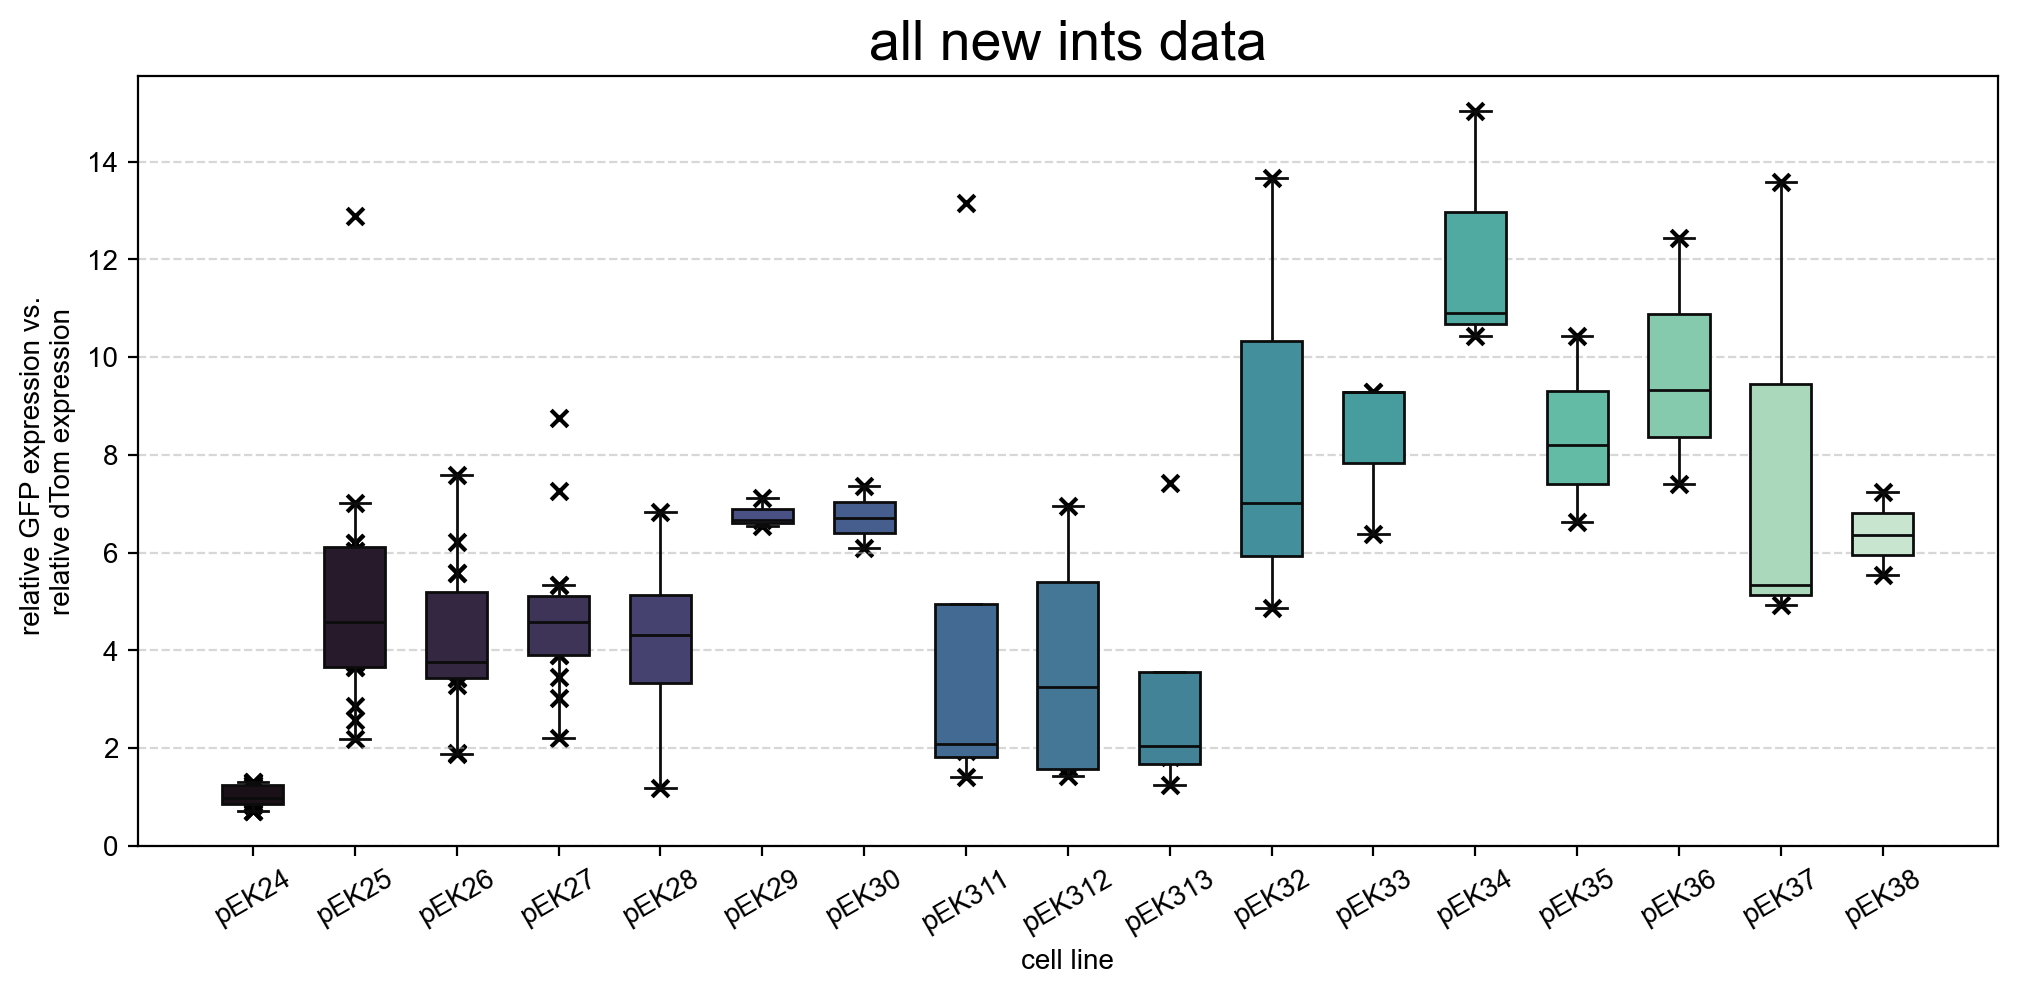

In [5]:
pretty_qPCR_boxplot(newints_12345, title="all new ints data", figsize=(12,5))

/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/1503091858.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sample_order'] = [dfSampleOrder[t] for t in df['sample_type']]
/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/1503091858.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('sample_order', inplace=True)
/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/1503091858.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

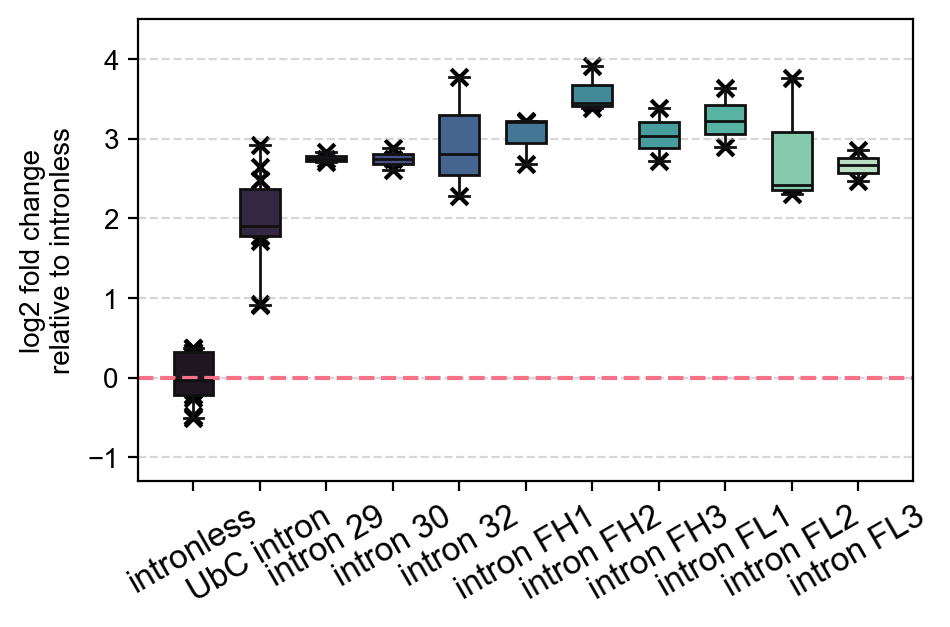

In [6]:
samples2plot = ['pEK24', 'pEK26','pEK29', 'pEK30',
                #'pEK311','pEK312','pEK313',
                'pEK32', 'pEK33', 'pEK34', 'pEK35', 'pEK36', 'pEK37', 'pEK38',]
samplenames2plot = ['intronless','UbC intron',
                    'intron 29','intron 30',
                    #'intron 31','intron 31','intron 31',
                    'intron 32',
                    'intron FH1','intron FH2','intron FH3',
                   'intron FL1',
                   'intron FL2',
                   'intron FL3']
df=newints_12345[newints_12345.sample_type.isin(samples2plot)]
dfSampleOrder = {samples2plot[n]:n for n in range(len(samples2plot))}
df['sample_order'] = [dfSampleOrder[t] for t in df['sample_type']]
df.sort_values('sample_order', inplace=True)
df.GFP2dTom = [np.log2(x) for x in df.GFP2dTom]

ax = plt.figure(figsize=(5,3))
plt.grid(axis='y', alpha=0.5, linestyle='--')
ax = sns.boxplot(x='sample_type', y='GFP2dTom', hue='sample_type', data=df, 
                 width=0.6, fliersize=0, palette='mako', legend=False)
ax.scatter(x='sample_type', y='GFP2dTom', data=df, color='black', marker='x')
ax.set_ylabel('log2 fold change\nrelative to intronless')
ax.set_xlabel('')
#ax.set_title('GFP/dTomato expression ratio',fontsize=20)
plt.xticks(range(len(samples2plot)),samplenames2plot,fontsize=12,rotation=30)
plt.axhline(0,linestyle='--')
plt.ylim(-1.3,4.5)
plt.show()

/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/1544159916.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sample_order'] = [dfSampleOrder[t] for t in df['sample_type']]
/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/1544159916.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('sample_order', inplace=True)
/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/1544159916.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

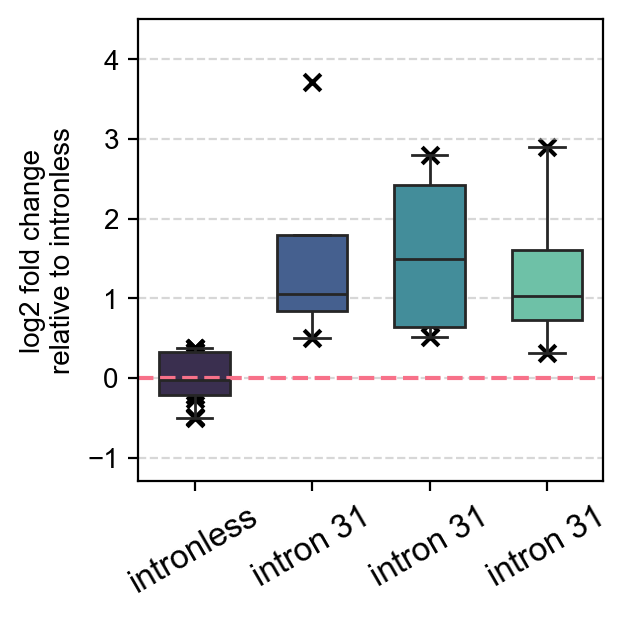

In [7]:
samples2plot = ['pEK24', #'pEK26','pEK29', 'pEK30',
                'pEK311','pEK312','pEK313',
                #'pEK32', 'pEK33', 'pEK34', 'pEK35', 'pEK36', 'pEK37', 'pEK38'
               ]
samplenames2plot = ['intronless',#'UbC intron',
                    #'intron 29','intron 30',
                    'intron 31','intron 31','intron 31',
                    #'intron 32',
                    #'intron FH1','intron FH2','intron FH3',
                   #'intron FL1','intron FL2','intron FL3'
                   ]
df=newints_12345[newints_12345.sample_type.isin(samples2plot)]
dfSampleOrder = {samples2plot[n]:n for n in range(len(samples2plot))}
df['sample_order'] = [dfSampleOrder[t] for t in df['sample_type']]
df.sort_values('sample_order', inplace=True)
df.GFP2dTom = [np.log2(x) for x in df.GFP2dTom]

ax = plt.figure(figsize=(3,3))
plt.grid(axis='y', alpha=0.5, linestyle='--')
ax = sns.boxplot(x='sample_type', y='GFP2dTom', hue='sample_type', data=df, 
                 width=0.6, fliersize=0, palette='mako', legend=False)
ax.scatter(x='sample_type', y='GFP2dTom', data=df, color='black', marker='x')
ax.set_ylabel('log2 fold change\nrelative to intronless')
ax.set_xlabel('')
#ax.set_title('GFP/dTomato expression ratio',fontsize=20)
plt.xticks(range(len(samples2plot)),samplenames2plot,fontsize=12,rotation=30)
plt.axhline(0,linestyle='--')
plt.ylim(-1.3,4.5)
plt.show()

# Import and process flow cytometry data

In [8]:
newints_names = ['HEKA2','pEK24',
            'pEK25',
            'pEK26',
            'pEK27',
            'pEK28',
            'pEK29',
            'pEK30',
            'pEK311',
            'pEK312',
            'pEK313',
            'pEK32',
            'pEK33',
            'pEK34',
            'pEK35',
            'pEK36',
            'pEK37',
            'pEK38']

In [9]:
import fcsparser

# function to read fcs data
def fcs_to_list(path):
    meta, data = fcsparser.parse(path, meta_data_only=False, reformat_meta=True)
    return list(data['FITC-A'])

# function to read FITC and PE
def fcs_to_list_with_dTom(path):
    meta, data = fcsparser.parse(path, meta_data_only=False, reformat_meta=True)
    return list(data['FITC-A']), list(data['PE-A'])

def fcs_to_list_dTom_only(path):
    meta, data = fcsparser.parse(path, meta_data_only=False, reformat_meta=True)
    return list(data['PE-A'])

In [10]:
newints_FITC = {}
samples = newints_names

for sample in samples:
    newintspath = outpath+'../../FACS/2023/March/HEK-new-ints-3-27-23/gfp dtom only fcs files/Specimen_001_%s_P3.fcs' % sample
    newints_FITC[sample] = list(fcs_to_list_with_dTom(newintspath))

df = pd.DataFrame.from_dict(newints_FITC, orient='index', columns = ['GFP','dTomato'])
df['Sample'] = df.index
flowdata = df.explode(['GFP', 'dTomato'])

In [11]:
# What is the median GFP/dTom fluorescence ratio for each sample
# after subtracting autofluorescence?

# Calculate the median fluorescence for the negative control
baseline_GFP = np.median(flowdata.GFP[flowdata.Sample=='HEKA2'])
baseline_dTom = np.median(flowdata.dTomato[flowdata.Sample=='HEKA2'])

# Normalize the data by subtracting the median parental cell fluorescence
norm_df = flowdata.copy()
norm_df['GFP'] = [(np.array(x-baseline_GFP)) for x in flowdata.GFP]
norm_df['dTomato'] = [(np.array(x-baseline_dTom)) for x in flowdata.dTomato]

In [12]:
# compute log ratio GFP/dTom
def safe_divide(gfp, dtomato):
    return gfp / dtomato if dtomato != 0 else np.nan
    
norm_df['log_ratio'] = np.log2([safe_divide(x,y) for x,y in zip(norm_df['GFP'],norm_df['dTomato'])])
norm_df = norm_df.dropna()

# normalize to intronless
intless_ratio = np.median(norm_df.log_ratio[norm_df.Sample=='pEK24'])
norm_df['intless_norm_ratio'] = norm_df['log_ratio'] - intless_ratio

# extract subset of samples for plotting
norm_df_to_plot = norm_df.reset_index().loc[:,['Sample','intless_norm_ratio']]
norm_df_subset_to_plot = norm_df_to_plot[norm_df_to_plot.Sample != 'HEKA2']

/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/3838999491.py:5: RuntimeWarning: divide by zero encountered in log2
  norm_df['log_ratio'] = np.log2([safe_divide(x,y) for x,y in zip(norm_df['GFP'],norm_df['dTomato'])])
/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/3838999491.py:5: RuntimeWarning: invalid value encountered in log2
  norm_df['log_ratio'] = np.log2([safe_divide(x,y) for x,y in zip(norm_df['GFP'],norm_df['dTomato'])])


In [13]:
norm_df_subset_to_plot

,Sample,intless_norm_ratio
33906,pEK24,-0.608349
33907,pEK24,0.651880
33908,pEK24,0.845436
33909,pEK24,-0.343000
33910,pEK24,0.387281
...,...,...
853192,pEK38,3.585023
853193,pEK38,3.205442
853194,pEK38,3.458538
853195,pEK38,3.695920


/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/2494615133.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(samplenames2plot, rotation=30)


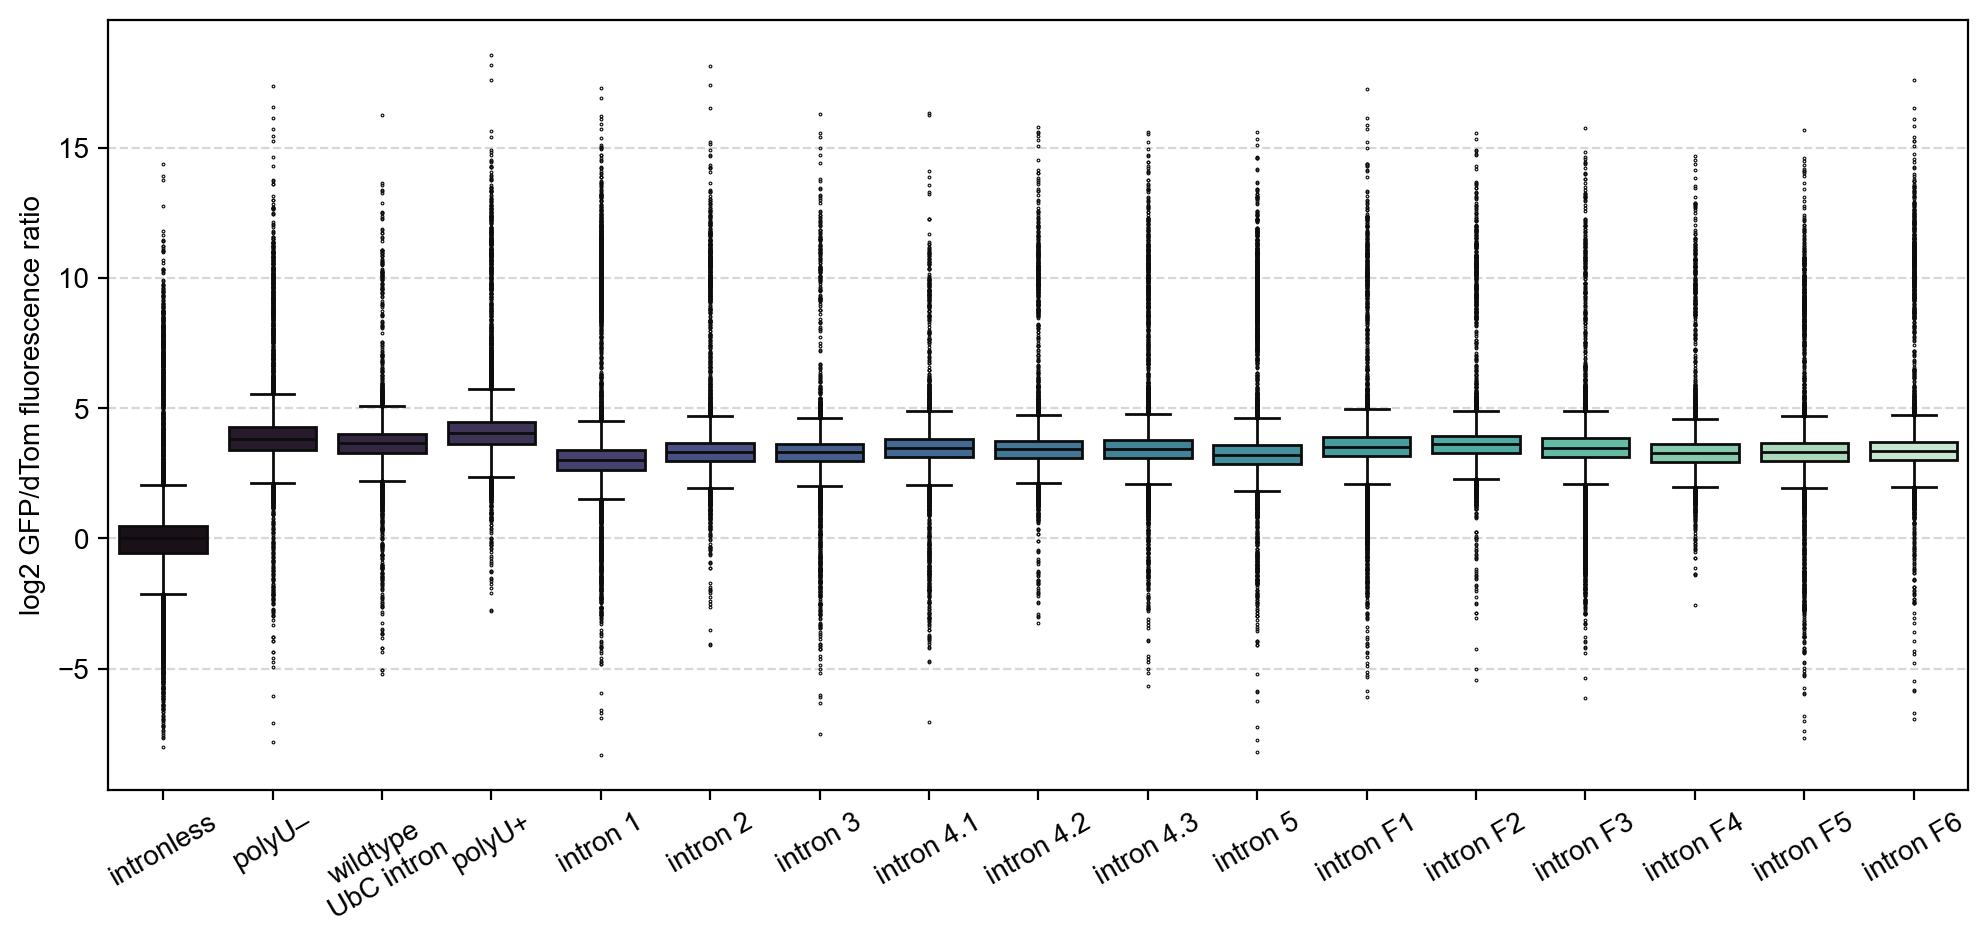

In [14]:
ax = plt.figure(figsize=(12,5))

plt.grid(axis='y', alpha=0.5, linestyle='--')

ax = sns.boxplot(x='Sample', y='intless_norm_ratio',  hue='Sample', 
                 legend=False, 
                 data=norm_df_subset_to_plot, 
                 width=0.8, fliersize=0.4, palette='mako')

ax.set_ylabel('log2 GFP/dTom fluorescence ratio')
ax.set_xlabel('')

samplenames2plot = ['intronless', 'polyU–', 'wildtype\nUbC intron', 'polyU+',
                   'intron 1', 'intron 2', 'intron 3', 'intron 4.1','intron 4.2','intron 4.3', 'intron 5',
                   'intron F1', 'intron F2', 'intron F3', 'intron F4', 'intron F5', 'intron F6']

ax.set_xticklabels(samplenames2plot, rotation=30)

#ax.set_axisbelow(True)
plt.show()

# combine and plot data from both experiments

In [15]:
#qPCR_data = newints_12345.reset_index().loc[:,['GFP2dTom','sample_type']]
#norm_df_subset_to_plot['nonlog_ratio'] = 2**norm_df_subset_to_plot.intless_norm_ratio
#flow_data = norm_df_subset_to_plot.loc[:,['nonlog_ratio','Sample']].rename(columns={"Sample": "sample_type", "nonlog_ratio": "GFP2dTom"})

qPCR_data = newints_12345.reset_index().loc[:,['GFP2dTom','sample_type']]
qPCR_data['GFP2dTom'] = np.log2(qPCR_data['GFP2dTom'])

flow_data = norm_df_subset_to_plot.loc[:,['intless_norm_ratio','Sample']].rename(columns={"Sample": "sample_type", "intless_norm_ratio": "GFP2dTom"})
samples = sorted(list(set(qPCR_data.sample_type)))

In [59]:
# Convert data to format for plotting

samples2plot = ['pEK24', 'pEK26','pEK28','pEK29', 'pEK30','pEK311',
                'pEK32','pEK312','pEK313',
                'pEK33', 'pEK34', 'pEK35', 'pEK36', 'pEK37', 'pEK38']

samplenames=['intronless','UbC intron','intron 28','intron 29','intron 30','intron 31',
             'intron 32','intron 31.2','intron 31.3',
             'intron FH1','intron FH2','intron FH3','intron FL1','intron FL2','intron FL3']

data = {
    'Sample': samples2plot,
    'qPCR_mean': [np.mean(qPCR_data.GFP2dTom[qPCR_data.sample_type==s]) for s in samples2plot],
    'qPCR_std': [np.std(qPCR_data.GFP2dTom[qPCR_data.sample_type==s]) for s in samples2plot],
    'qPCR_sem': [sp.stats.sem(qPCR_data.GFP2dTom[qPCR_data.sample_type==s]) for s in samples2plot],
    'flow_mean': [np.mean(np.ma.masked_invalid(flow_data.GFP2dTom[flow_data.sample_type==s])) for s in samples2plot],
    'flow_std': [np.std(np.ma.masked_invalid(flow_data.GFP2dTom[flow_data.sample_type==s])) for s in samples2plot],
    'flow_sem': [sp.stats.sem(np.ma.masked_invalid(flow_data.GFP2dTom[flow_data.sample_type==s])) for s in samples2plot]
}
df = pd.DataFrame(data)

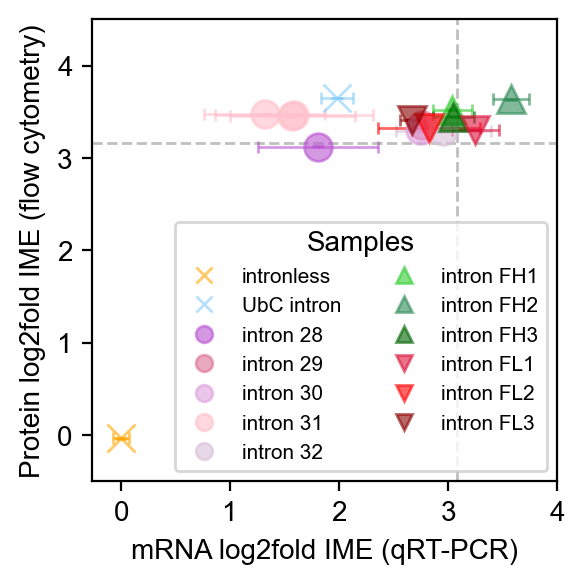

In [60]:
samplecolors=['orange',#'goldenrod',
              'lightskyblue',#'gold',
              'mediumorchid',
              'palevioletred',
              'plum','pink',
             'thistle']+['pink']*2+['limegreen',
                                    'seagreen',
                                    'darkgreen']+['crimson',
                                                    'red',
                                                    'darkred']

samplemarkers=['x']*2+['o']*7+['^']*3+['v']*3


# Create the scatter plot with STD error bars
plt.figure(figsize=(3, 3))
legend_elements = []
for i, row in df.iterrows():
    plt.errorbar(
        x=row['qPCR_mean'], y=row['flow_mean'],
        xerr=row['qPCR_sem'], yerr=row['flow_sem'],
        fmt=samplemarkers[i], capsize=2, linewidth=1,
        markersize=10,
        color=samplecolors[i], alpha=0.6
    )
    if i in [7,8]:
        continue
    legend_elements.append(Line2D([0],[0], 
                                  marker=samplemarkers[i],
                                  markerfacecolor=samplecolors[i], 
                                  markeredgecolor=samplecolors[i], 
                                  alpha=0.6, 
                                  linewidth=0,
                                  label=samplenames[i]))

plt.xlabel('mRNA log2fold IME (qRT-PCR)')
plt.ylabel('Protein log2fold IME (flow cytometry)')
plt.xticks([0,1,2,3,4])

plt.axhline(np.log2(8.93), c='grey',alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(np.log2(8.44), c='grey',alpha=0.5, linewidth=1, linestyle='--')
#plt.title('Validation of cloned individual random introns')

plt.ylim(-0.5, 4.5)
plt.legend(title='Samples',handles=legend_elements, fontsize=7.5, ncol=2,
           #bbox_to_anchor=(1,1),
          loc=4
          )
plt.savefig('figures/Fig5E.png', dpi=900, bbox_inches='tight')
plt.show()

# polyU reporters

### import & plot BB2 results:

In [61]:
# Convert data to format for plotting

samples2plot = ['pEK24', 'pEK25','pEK26','pEK27']

samplenames=['intronless','polyU–','WT UbC','polyU+',]

data = {
    'Sample': samples2plot,
    'qPCR_mean': [np.mean(qPCR_data.GFP2dTom[qPCR_data.sample_type==s]) for s in samples2plot],
    'qPCR_std': [np.std(qPCR_data.GFP2dTom[qPCR_data.sample_type==s]) for s in samples2plot],
    'flow_mean': [np.mean(np.ma.masked_invalid(flow_data.GFP2dTom[flow_data.sample_type==s])) for s in samples2plot],
    'flow_std': [np.std(np.ma.masked_invalid(flow_data.GFP2dTom[flow_data.sample_type==s])) for s in samples2plot]
}
df = pd.DataFrame(data)

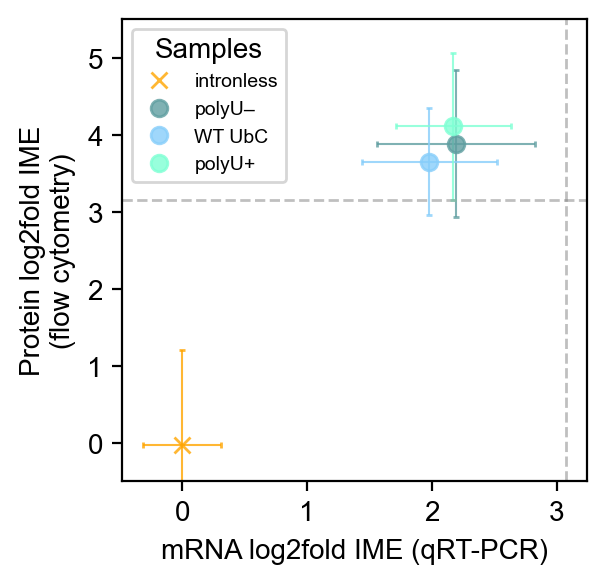

In [62]:
from matplotlib.lines import Line2D

samplecolors=['orange',
              'cadetblue',
              'lightskyblue',
             'aquamarine']

samplemarkers=['x']+['o']*3


# Create the scatter plot with error bars
plt.figure(figsize=(3, 3))
legend_elements = []
for i, row in df.iterrows():
    plt.errorbar(
        x=row['qPCR_mean'], y=row['flow_mean'],
        xerr=row['qPCR_std'], yerr=row['flow_std'],
        fmt=samplemarkers[i], capsize=1, linewidth=0.75,
        color=samplecolors[i], alpha=0.8
    )
    if i in [7,8]:
        continue
    legend_elements.append(Line2D([0],[0], 
                                  marker=samplemarkers[i],
                                  markerfacecolor=samplecolors[i], 
                                  markeredgecolor=samplecolors[i], 
                                  alpha=0.8, 
                                  linewidth=0,
                                  label=samplenames[i]))

plt.xlabel('mRNA log2fold IME (qRT-PCR)')
plt.ylabel('Protein log2fold IME\n(flow cytometry)')

plt.axhline(np.log2(8.93), c='grey',alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(np.log2(8.44), c='grey',alpha=0.5, linewidth=1, linestyle='--')
#plt.title('Validation of cloned individual random introns')

plt.ylim(-0.5, 5.5)
plt.legend(title='Samples', handles=legend_elements, fontsize=7, #bbox_to_anchor=(1,0.96)
          loc='upper left')
plt.show()


### import & plot BB1 results:

In [63]:
def RepGroupResult_to_RQs(filename, primer_efficiencies, baseline_sample_name):
    # import plate data as table of per sample average of tech reps:
    df = pd.read_csv('/Users/emmakowal/Dropbox (MIT)/Lab/qPCR/2022-3/%s' % filename, 
                     sep=',', header=0, usecols = [0,1,2,3,4])
    df.columns = ['Sample','Target','Cq','Cq SD','Plate']
    platemap = {df.Sample[i]:df.Plate[i] for i in df.index}

    # make lists of relevant sample/target subsets
    # assume control samples are standard curve dilutions, NRT, NTC
    samples_with_controls = list(set(df.Sample))
    samples = [s for s in samples_with_controls if (':' not in s) & (s != 'NRT') & (s != 'NTC')]
    targets = list(set(df.Target))
    control_targets = ['GAPDH', 'SRP14', 'RPL27']
    
    # get mean signal for each target from baseline samples to normalize to (typically intronless)
    baseline_means = {t:0 for t in targets}
    for t in targets:
        baseline_means[t] = np.mean(df.Cq[(df.Sample.str.contains(baseline_sample_name))&(df.Target==t)])
    
    # get delta cts from these control means for all other samples
    delta_cts = pd.DataFrame(index=samples,columns=targets)
    for t in targets:
        delta_cts[t] = [baseline_means[t] - float(df.Cq[(df.Sample==p)&(df.Target==t)]) for p in samples]
    #print(baseline_means['RPL27'])
    #print(float(df.Cq[(df.Sample=='polyU- 5')&(df.Target=='RPL27')]))
    #print(delta_cts['RPL27'][delta_cts.index==('polyU- 5')])
        
    # convert delta cts to relative quantities using target-specific amplification efficiencies
    RQs = delta_cts.copy()
    eff_base = {k:(v/100)+1 for (k,v) in primer_efficiencies.items()}
    for t in targets:
        RQs[t] = eff_base[t]**delta_cts[t]
    #print(RQs['RPL27']['polyU- 5'])

    # compute geometric mean of endogenous control genes for each sample as normalization factor
    RQs['endog_gmean'] = [gmean(RQs.loc[p,control_targets]) for p in samples]
    #print(RQs['endog_gmean']['polyU- 5'])
    
    # divide RQ of GFP and dTom separately by the endogenous geo. mean to get relative expression
    RQs['relative GFP expression'] = [(RQs.loc[p,'GFP3']/RQs.loc[p,'endog_gmean']) for p in samples]
    RQs['relative dTom expression'] = [(RQs.loc[p,'dTom3']/RQs.loc[p,'endog_gmean']) for p in samples]
    #print(RQs['relative GFP expression']['polyU- 5'])
    #print(RQs['relative dTom expression']['polyU- 5'])

    # divide relative GFP exp. by relative dTom exp. to get expression ratio
    RQs['GFP2dTom'] = [(RQs.loc[p,'relative GFP expression']/RQs.loc[p,'relative dTom expression']) for p in samples]
    #print(RQs['GFP2dTom']['polyU- 5'])
    
    RQs['Plate'] = [platemap[s] for s in RQs.index]

    return RQs

/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/4157691679.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_cts[t] = [baseline_means[t] - float(df.Cq[(df.Sample==p)&(df.Target==t)]) for p in samples]


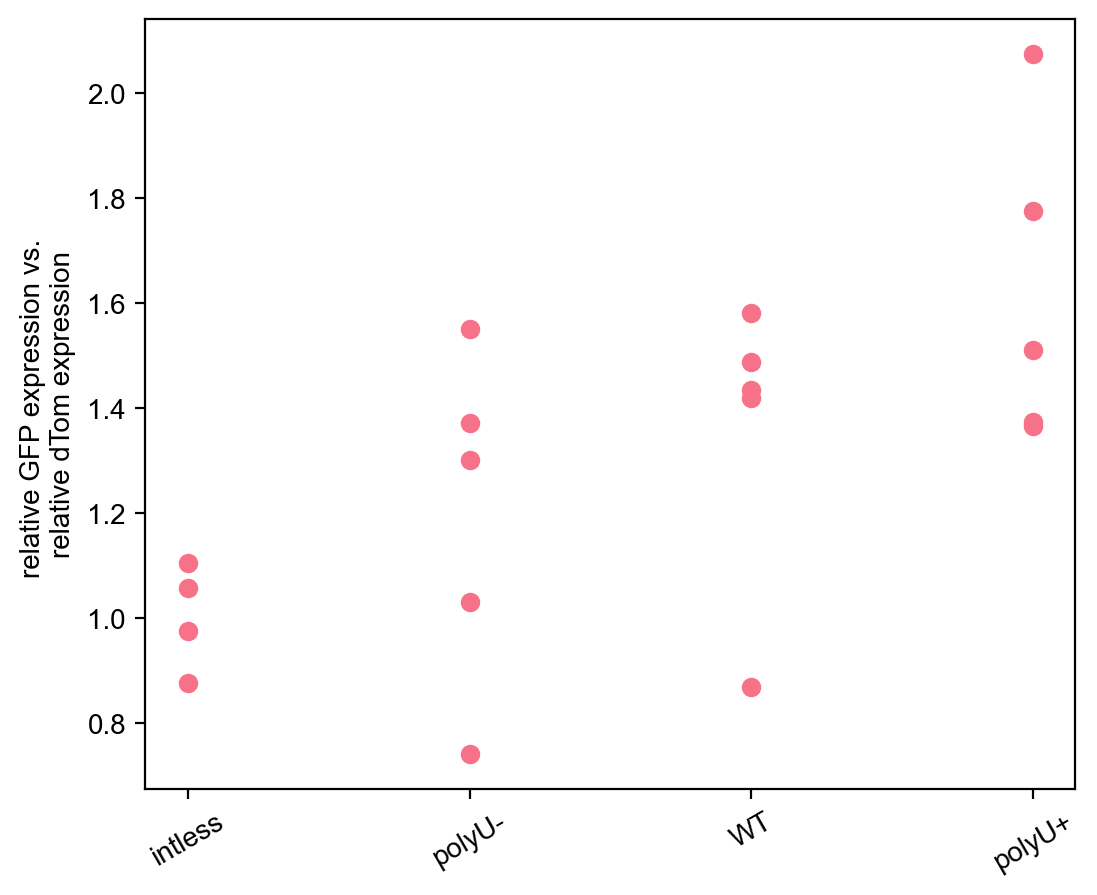

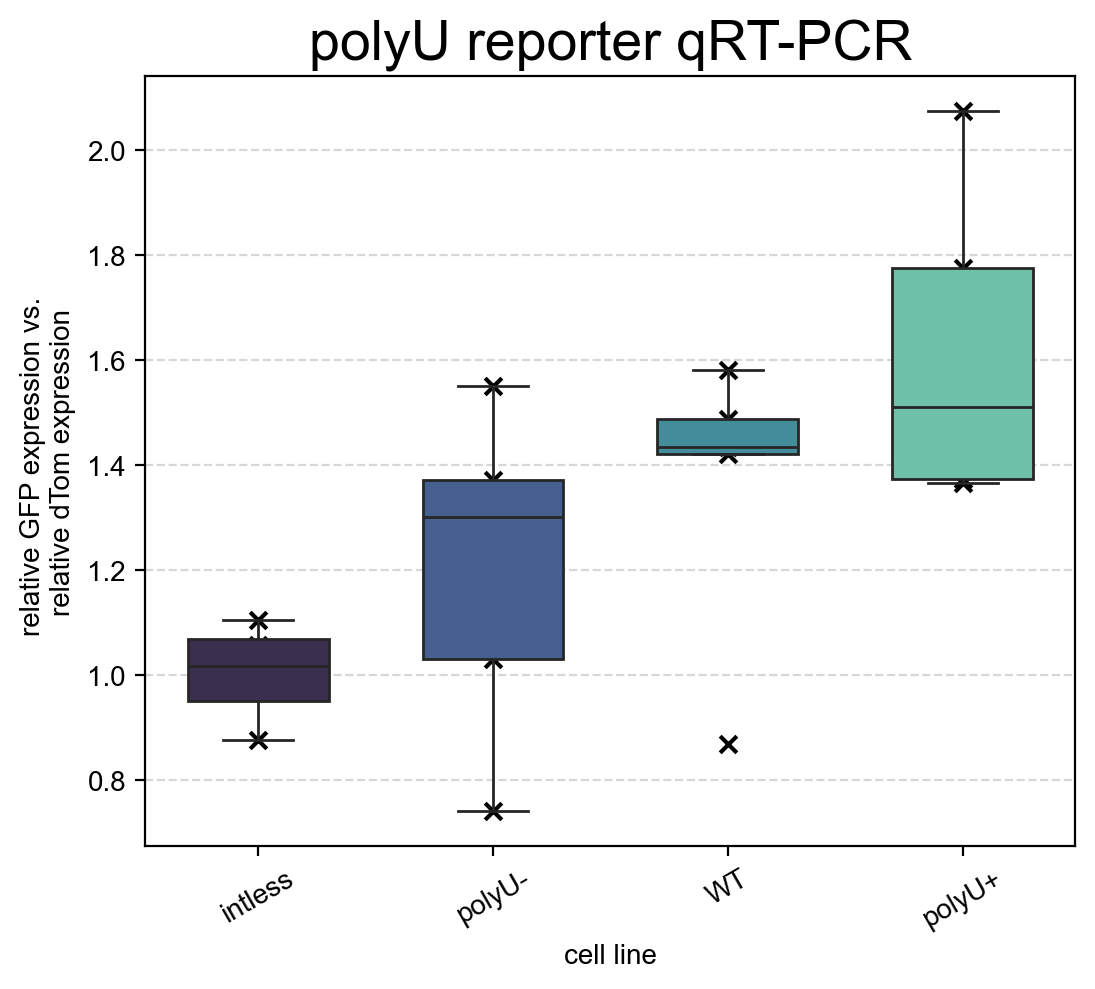

In [64]:
# applying functions to polyU plate from 11-23-22:

# primer efficiencies for this plate (calculated by thermo quantstudio std curves module)
eff = {'GAPDH':110.9,
      'RPL27':101.7,
      'GFP3':91.5,
      'dTom3':103.1,
      'SRP14':161.0}

polyU2 = RepGroupResult_to_RQs('112322_polyU_ReplicateGroupResult.csv', eff, 'intless')

# group biological replicates and reorder samples for plotting
polyU2['sample_type'] = [s.split(' ')[0] for s in list(polyU2.index)]
polyUsampleOrder = {'intless':0,'polyU-':1,'WT':2,'polyU+':3}
polyU2['sample_order'] = [polyUsampleOrder[t] for t in polyU2['sample_type']]
polyU2.sort_values('sample_order', inplace=True)

basic_qPCR_scatterplot(polyU2)
pretty_qPCR_boxplot(polyU2)

In [65]:
BB1_polyU_FACS = {}
samples = ['A2','GFP-','dTom-','intronless', 'polyU-', 'WT', 'polyU+']

for i, sample in enumerate(samples):
    HEKpath = f'/Users/emmakowal/Dropbox (MIT)/Lab/FACS/2022/May 2022/HEK-polyU-repeat-txf/Specimen_001_293-{sample}_00{i+1}.fcs'
    BB1_polyU_FACS[sample] = fcs_to_list_with_dTom(HEKpath)

In [66]:
df = pd.DataFrame.from_dict(BB1_polyU_FACS, orient='index', columns = ['GFP','dTomato'])
df['Sample'] = df.index
BB1_polyU_flowdata = df.explode(['GFP', 'dTomato'])

In [67]:
# What is the median GFP/dTom fluorescence ratio for each sample
# after subtracting autofluorescence?

# Calculate the median fluorescence for the negative control
BB1_polyU_baseline_GFP = np.median(BB1_polyU_flowdata.GFP[BB1_polyU_flowdata.Sample=='A2'])
BB1_polyU_baseline_dTom = np.median(BB1_polyU_flowdata.dTomato[BB1_polyU_flowdata.Sample=='A2'])

# Normalize the data by subtracting the median parental cell fluorescence
BB1_polyU_norm_df = BB1_polyU_flowdata.copy()
BB1_polyU_norm_df['GFP'] = [(np.array(x-BB1_polyU_baseline_GFP)) for x in BB1_polyU_flowdata.GFP]
BB1_polyU_norm_df['dTomato'] = [(np.array(x-BB1_polyU_baseline_dTom)) for x in BB1_polyU_flowdata.dTomato]

In [68]:
# compute log ratio GFP/dTom
def safe_divide(gfp, dtomato):
    return gfp / dtomato if dtomato != 0 else np.nan
    
BB1_polyU_norm_df['log_ratio'] = np.log2([safe_divide(x,y) for x,y in zip(BB1_polyU_norm_df['GFP'],BB1_polyU_norm_df['dTomato'])])
BB1_polyU_norm_df = BB1_polyU_norm_df.dropna()

# normalize to intronless
intless_ratio = np.median(BB1_polyU_norm_df.log_ratio[BB1_polyU_norm_df.Sample=='intronless'])
BB1_polyU_norm_df['intless_norm_ratio'] = BB1_polyU_norm_df['log_ratio'] - intless_ratio

# extract subset of samples for plotting
norm_df_to_plot = BB1_polyU_norm_df.reset_index().loc[:,['Sample','intless_norm_ratio']]
norm_df_subset_to_plot = norm_df_to_plot[norm_df_to_plot.Sample.isin(['intronless', 'polyU-', 'WT', 'polyU+'])]


/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/1946403205.py:5: RuntimeWarning: divide by zero encountered in log2
  BB1_polyU_norm_df['log_ratio'] = np.log2([safe_divide(x,y) for x,y in zip(BB1_polyU_norm_df['GFP'],BB1_polyU_norm_df['dTomato'])])
/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/1946403205.py:5: RuntimeWarning: invalid value encountered in log2
  BB1_polyU_norm_df['log_ratio'] = np.log2([safe_divide(x,y) for x,y in zip(BB1_polyU_norm_df['GFP'],BB1_polyU_norm_df['dTomato'])])


/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_45438/2883622267.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(samplenames2plot, rotation=30)


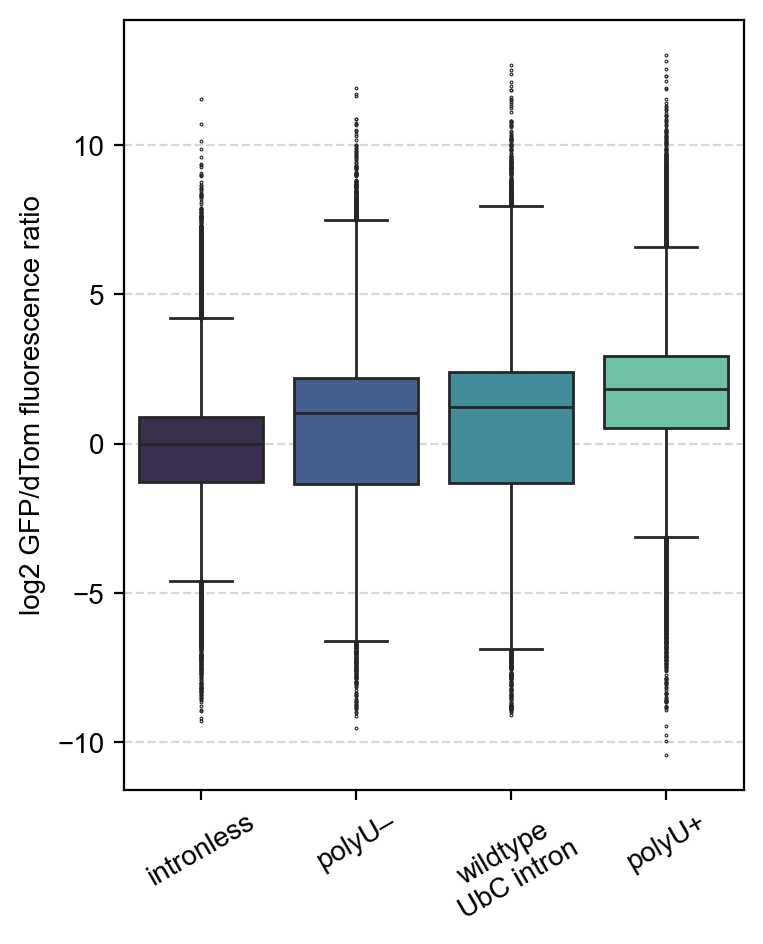

In [69]:
ax = plt.figure(figsize=(4,5))

plt.grid(axis='y', alpha=0.5, linestyle='--')

ax = sns.boxplot(x='Sample', y='intless_norm_ratio',  hue='Sample', 
                 legend=False, 
                 data=norm_df_subset_to_plot, 
                 width=0.8, fliersize=0.4, palette='mako')

ax.set_ylabel('log2 GFP/dTom fluorescence ratio')
ax.set_xlabel('')

samplenames2plot = ['intronless', 'polyU–', 'wildtype\nUbC intron', 'polyU+']

ax.set_xticklabels(samplenames2plot, rotation=30)

#ax.set_axisbelow(True)
plt.show()

In [70]:
vcs(norm_df_subset_to_plot.Sample)

Sample
intronless    74749
WT            73906
polyU+        65239
polyU-        61755
Name: count, dtype: int64

In [71]:
polyU2

,RPL27,SRP14,GAPDH,dTom3,GFP3,endog_gmean,relative GFP expression,relative dTom expression,GFP2dTom,Plate,sample_type,sample_order
intless 5,1.195751,1.222779,0.981781,1.102177,1.076205,1.128066,0.954026,0.977050,0.976436,NaN,intless,0
intless 4,1.041256,1.142939,1.041524,1.181127,1.035000,1.074196,0.963512,1.099546,0.876282,NaN,intless,0
intless 3,1.037371,0.892116,0.850729,0.931878,0.985011,0.923384,1.066740,1.009199,1.057016,NaN,intless,0
intless 6,0.774226,0.802061,1.149542,0.824314,0.911431,0.893717,1.019821,0.922344,1.105684,NaN,intless,0
polyU- 7,2.226015,2.825762,1.220945,0.972915,1.509239,1.972967,0.764959,0.493123,1.551255,NaN,polyU-,1
polyU- 5,2.227630,2.859502,1.174478,0.933226,1.279972,1.955807,0.654447,0.477156,1.371557,NaN,polyU-,1
polyU- 3,1.060992,1.099972,1.414186,1.187418,1.546098,1.181771,1.308289,1.004779,1.302067,NaN,polyU-,1
polyU- 4,1.136148,0.631724,1.600222,1.655089,1.225915,1.047243,1.170612,1.580424,0.740695,NaN,polyU-,1
polyU- 6,2.106070,2.804934,1.023212,1.860706,1.917486,1.821603,1.052636,1.021466,1.030515,NaN,polyU-,1
WT 3,2.099377,3.165994,1.159940,1.020215,1.612991,1.975507,0.816495,0.516432,1.581030,NaN,WT,2


In [72]:
polyU2['sample_type'] = [x.replace('intless','intronless') for x in polyU2['sample_type']]
polyU2['GFP2dTom'] = np.log2(polyU2['GFP2dTom'])
polyU2_to_plot = polyU2[['GFP2dTom','sample_type']]

In [73]:
norm_df_subset_to_plot.columns = ['sample_type','GFP2dTom']
norm_df_subset_to_plot

,sample_type,GFP2dTom
239060,intronless,4.620020
239061,intronless,0.778952
239062,intronless,-0.191452
239063,intronless,1.343645
239064,intronless,-2.051821
...,...,...
514704,polyU+,4.231959
514705,polyU+,1.035533
514706,polyU+,-3.160346
514707,polyU+,3.932586


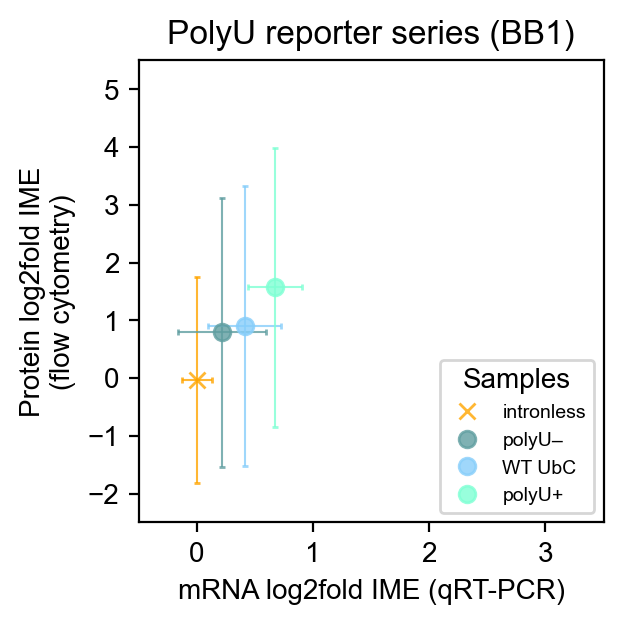

In [74]:
# Convert data to format for plotting

samples2plot = ['intronless','polyU-','WT','polyU+',]

data = {
    'Sample': samples2plot,
    'qPCR_mean': [np.mean(polyU2_to_plot.GFP2dTom[polyU2_to_plot.sample_type==s]) for s in samples2plot],
    'qPCR_std': [np.std(polyU2_to_plot.GFP2dTom[polyU2_to_plot.sample_type==s]) for s in samples2plot],
    'flow_mean': [np.mean(np.ma.masked_invalid(norm_df_subset_to_plot.GFP2dTom[norm_df_subset_to_plot.sample_type==s])) for s in samples2plot],
    'flow_std': [np.std(np.ma.masked_invalid(norm_df_subset_to_plot.GFP2dTom[norm_df_subset_to_plot.sample_type==s])) for s in samples2plot]
}
df = pd.DataFrame(data)

samplecolors=['orange',
              'cadetblue',
              'lightskyblue',
             'aquamarine']

samplemarkers=['x']+['o']*3


# Create the scatter plot with error bars
plt.figure(figsize=(3, 3))
legend_elements = []
for i, row in df.iterrows():
    plt.errorbar(
        x=row['qPCR_mean'], y=row['flow_mean'],
        xerr=row['qPCR_std'], yerr=row['flow_std'],
        fmt=samplemarkers[i], capsize=1, linewidth=0.75,
        color=samplecolors[i], alpha=0.8
    )
    if i in [7,8]:
        continue
    legend_elements.append(Line2D([0],[0], 
                                  marker=samplemarkers[i],
                                  markerfacecolor=samplecolors[i], 
                                  markeredgecolor=samplecolors[i], 
                                  alpha=0.8, 
                                  linewidth=0,
                                  label=samplenames[i]))

plt.xlabel('mRNA log2fold IME (qRT-PCR)')
plt.ylabel('Protein log2fold IME\n(flow cytometry)')
plt.title('PolyU reporter series (BB1)')

#axl = plt.axhline(np.log2(8.93), c='grey',alpha=0.5, linewidth=1, linestyle='--',
#           label='random\nlibrary\nmean')
#legend_elements.append(axl)
#plt.axvline(np.log2(4.97), c='grey',alpha=0.5, linewidth=1, linestyle='--')

plt.ylim(-2.5, 5.5)
plt.xlim(-0.5, 3.5)
plt.legend(title='Samples',handles=legend_elements, fontsize=7, #bbox_to_anchor=(1,0.96)
          loc='lower right')
plt.show()


In [75]:
2**1.4

2.6390158215457884

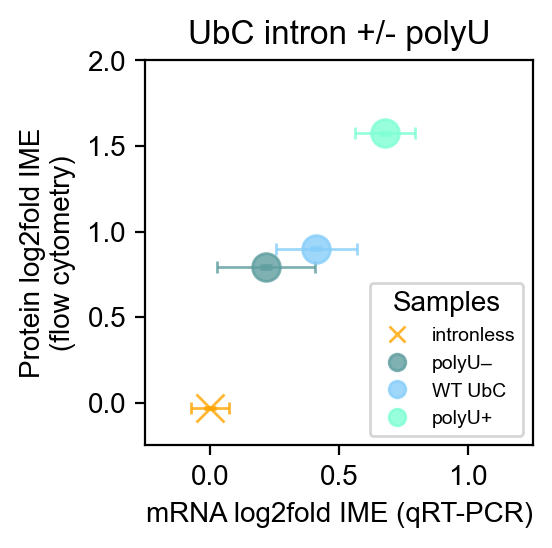

In [80]:
# Convert data to format for plotting

samples2plot = ['intronless','polyU-','WT','polyU+',]

data = {
    'Sample': samples2plot,
    'qPCR_mean': [np.mean(polyU2_to_plot.GFP2dTom[polyU2_to_plot.sample_type==s]) for s in samples2plot],
    'qPCR_std': [np.std(polyU2_to_plot.GFP2dTom[polyU2_to_plot.sample_type==s]) for s in samples2plot],
    'qPCR_sem': [sp.stats.sem(polyU2_to_plot.GFP2dTom[polyU2_to_plot.sample_type==s]) for s in samples2plot],
    'flow_mean': [np.mean(np.ma.masked_invalid(norm_df_subset_to_plot.GFP2dTom[norm_df_subset_to_plot.sample_type==s])) for s in samples2plot],
    'flow_std': [np.std(np.ma.masked_invalid(norm_df_subset_to_plot.GFP2dTom[norm_df_subset_to_plot.sample_type==s])) for s in samples2plot],
    'flow_sem': [sp.stats.sem(np.ma.masked_invalid(norm_df_subset_to_plot.GFP2dTom[norm_df_subset_to_plot.sample_type==s])) for s in samples2plot]
}
df = pd.DataFrame(data)

samplecolors=['orange',
              'cadetblue',
              'lightskyblue',
             'aquamarine']

samplemarkers=['x']+['o']*3


# Create the scatter plot with SEM error bars
plt.figure(figsize=(2.5, 2.5))
legend_elements = []
for i, row in df.iterrows():
    plt.errorbar(
        x=row['qPCR_mean'], y=row['flow_mean'],
        xerr=row['qPCR_sem'], yerr=row['flow_sem'],
        markersize=10,
        fmt=samplemarkers[i], capsize=2, linewidth=1,
        color=samplecolors[i], alpha=0.8
    )
    if i in [7,8]:
        continue
    legend_elements.append(Line2D([0],[0], 
                                  marker=samplemarkers[i],
                                  markerfacecolor=samplecolors[i], 
                                  markeredgecolor=samplecolors[i], 
                                  alpha=0.8, 
                                  linewidth=0,
                                  label=samplenames[i]))

plt.xlabel('mRNA log2fold IME (qRT-PCR)')
plt.ylabel('Protein log2fold IME\n(flow cytometry)')
plt.title('UbC intron +/- polyU')

#axl = plt.axhline(np.log2(8.93), c='grey',alpha=0.5, linewidth=1, linestyle='--',
#           label='random\nlibrary\nmean')
#legend_elements.append(axl)
#plt.axvline(np.log2(4.97), c='grey',alpha=0.5, linewidth=1, linestyle='--')

plt.ylim(-0.25, 2)
plt.xlim(-0.25, 1.25)
plt.legend(title='Samples',handles=legend_elements, fontsize=7, #bbox_to_anchor=(1,0.96)
          loc='lower right')
plt.savefig('figures/fig7G.png', dpi=900, bbox_inches='tight')
plt.show()

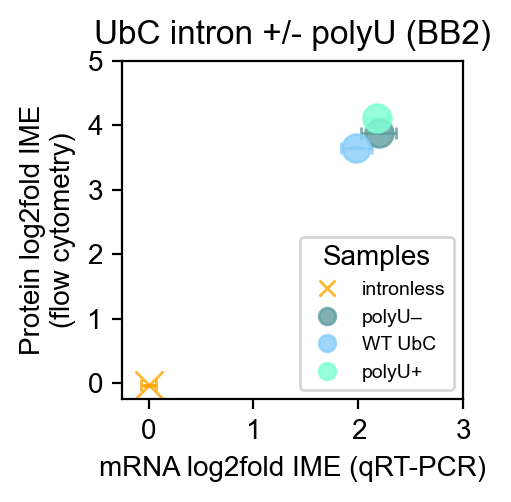

In [85]:
# Convert data to format for plotting

samples2plot = ['pEK24', 'pEK25','pEK26','pEK27']

samplenames=['intronless','polyU–','WT UbC','polyU+',]

data = {
    'Sample': samples2plot,
    'qPCR_mean': [np.mean(qPCR_data.GFP2dTom[qPCR_data.sample_type==s]) for s in samples2plot],
    'qPCR_std': [np.std(qPCR_data.GFP2dTom[qPCR_data.sample_type==s]) for s in samples2plot],
    'qPCR_sem': [sp.stats.sem(qPCR_data.GFP2dTom[qPCR_data.sample_type==s]) for s in samples2plot],
    'flow_mean': [np.mean(np.ma.masked_invalid(flow_data.GFP2dTom[flow_data.sample_type==s])) for s in samples2plot],
    'flow_std': [np.std(np.ma.masked_invalid(flow_data.GFP2dTom[flow_data.sample_type==s])) for s in samples2plot],
    'flow_sem': [sp.stats.sem(np.ma.masked_invalid(flow_data.GFP2dTom[flow_data.sample_type==s])) for s in samples2plot]
}
df = pd.DataFrame(data)

samplecolors=['orange',
              'cadetblue',
              'lightskyblue',
             'aquamarine']

samplemarkers=['x']+['o']*3


# Create scatter plot with SEM error bars
plt.figure(figsize=(2.2, 2.2))
legend_elements = []
for i, row in df.iterrows():
    plt.errorbar(
        x=row['qPCR_mean'], y=row['flow_mean'],
        xerr=row['qPCR_sem'], yerr=row['flow_sem'],
        markersize=10,
        fmt=samplemarkers[i], capsize=2, linewidth=1,
        color=samplecolors[i], alpha=0.8
    )
    if i in [7,8]:
        continue
    legend_elements.append(Line2D([0],[0], 
                                  marker=samplemarkers[i],
                                  markerfacecolor=samplecolors[i], 
                                  markeredgecolor=samplecolors[i], 
                                  alpha=0.8, 
                                  linewidth=0,
                                  label=samplenames[i]))

plt.xlabel('mRNA log2fold IME (qRT-PCR)')
plt.ylabel('Protein log2fold IME\n(flow cytometry)')
plt.title('UbC intron +/- polyU (BB2)')

#axl = plt.axhline(np.log2(8.93), c='grey',alpha=0.5, linewidth=1, linestyle='--',
#           label='random\nlibrary\nmean')
#legend_elements.append(axl)
#plt.axvline(np.log2(4.97), c='grey',alpha=0.5, linewidth=1, linestyle='--')

plt.ylim(-0.25, 5)
plt.xlim(-0.25, 3)
plt.legend(title='Samples', handles=legend_elements, fontsize=7, #bbox_to_anchor=(1,0.96)
          loc='lower right')
plt.savefig('figures/figS4E.png', dpi=900, bbox_inches='tight')
plt.show()
